Analysis of related data "CHINOOK"

In [2]:
import mysql.connector
import pandas  as pd
import mysql_config as cnfg
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
import seaborn as sns
import numpy as np
from scipy.stats import shapiro, kstest, probplot
from scipy.stats import pearsonr,spearmanr
import warnings

Dataframes are created by using ReadData function thats made before:

In [3]:

def ReadData(table,database):
    
    con = mysql.connector.connect(
    host=cnfg.host,
    port=cnfg.port,
    user=cnfg.user,
    password=cnfg.password,
    database=database)
    
    
    cur = con.cursor()

    cur.execute('SELECT* FROM '+table)
    
    cur.fetchall()

    dataframe = pd.read_sql('SELECT * FROM '+table, con)
    
    return dataframe


warnings.filterwarnings('ignore')



In [4]:
df_album=ReadData(table="album",database="chinook")
df_artist=ReadData(table="artist",database="chinook")
df_customer=ReadData(table="customer",database="chinook")
df_employee=ReadData(table="employee",database="chinook")
df_genre=ReadData(table="genre",database="chinook")
df_invoice=ReadData(table="invoice",database="chinook")
df_invoiceline=ReadData(table="invoiceline",database="chinook")
df_mediatype=ReadData(table="mediatype",database="chinook")
df_playlisttrack=ReadData(table="playlisttrack",database="chinook")
df_track=ReadData(table="track",database="chinook")

In [37]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrackId       3503 non-null   int64  
 1   Name          3503 non-null   object 
 2   AlbumId       3503 non-null   int64  
 3   MediaTypeId   3503 non-null   int64  
 4   GenreId       3503 non-null   int64  
 5   Composer      2526 non-null   object 
 6   Milliseconds  3503 non-null   int64  
 7   Bytes         3503 non-null   int64  
 8   UnitPrice     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


All dataframes info are checked.As result ,There are 2 variables that can be considered as KPI :
'total revenue per invoice' and 'Quantity of tracks per invoice' 

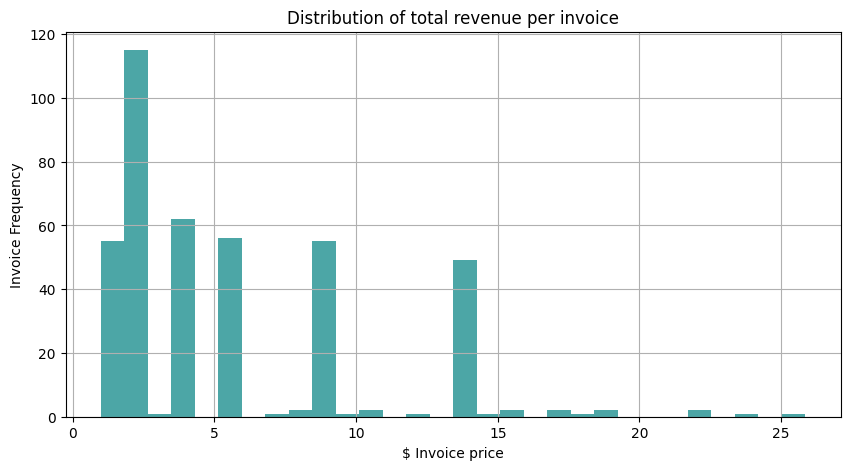

In [5]:
# KPI_1:'total revenue per invoice'

plt.figure(figsize=(10, 5))
plt.hist( df_invoice['Total'], bins=30, alpha=0.7, color='teal')
plt.title(f'Distribution of {'total revenue per invoice'}')
plt.xlabel('$ Invoice price')
plt.ylabel('Invoice Frequency')
plt.grid()
plt.show()    

     InvoiceId  Track_per_invoice
0            1                  2
1            2                  4
2            3                  6
3            4                  9
4            5                 14
..         ...                ...
407        408                  4
408        409                  6
409        410                  9
410        411                 14
411        412                  1

[412 rows x 2 columns]


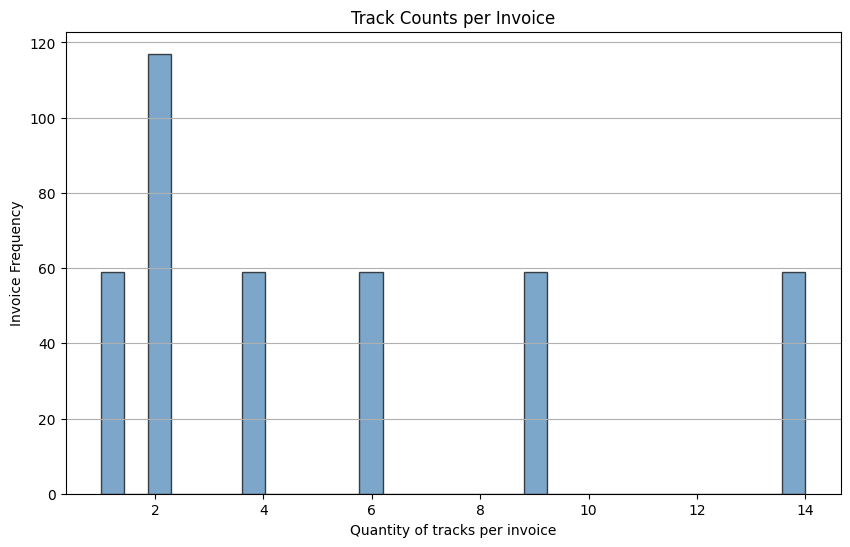

In [6]:
# KPI_2:'Quantity of tracks per invoice'

track_count_per_invoice = df_invoiceline.groupby('InvoiceId')['Quantity'].count().reset_index()
track_count_per_invoice.columns = ['InvoiceId', 'Track_per_invoice']

print(track_count_per_invoice)



# histogram
plt.figure(figsize=(10, 6))
plt.hist(track_count_per_invoice['Track_per_invoice'], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Track Counts per Invoice')
plt.xlabel('Quantity of tracks per invoice')
plt.ylabel('Invoice Frequency')
plt.grid(axis='y')
plt.show()

To check the normality of the distribution of KIP1 and KIP2, three different methods can be used:
1- Shapiro-Wilk test
2- Kolmogorov-Smirnov test
3- Graphical assessment

Shapiro-Wilk test: p-value = 3.4001843897448504e-20 ,  stat=0.8367111017894937
Distribution of total revenue per invoice does not look Gaussian (reject H0)
Kolmogorov-Smirnov test: p-value = 2.1324912710029327e-15
Distribution of total revenue per invoice does not look Gaussian (reject H0)


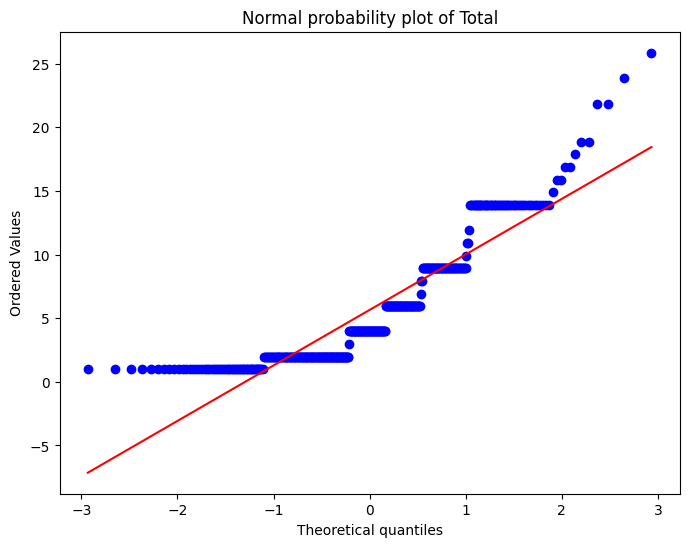

In [7]:
H0 ='Distribution of total revenue per invoice looks Gaussian'

# Shapiro-Wilk test:

stat,p_value=shapiro(df_invoice['Total'])
print(f"Shapiro-Wilk test: p-value = {p_value} ,  stat={stat}")

alpha = 0.05
if p_value > alpha:
    print('Distribution of total revenue per invoice looks Gaussian (fail to reject H0)')
else:
    print('Distribution of total revenue per invoice does not look Gaussian (reject H0)')

# Kolmogorov-Smirnov test:

ks_result = kstest(df_invoice['Total'], 'norm', args=(df_invoice['Total'].mean(), df_invoice['Total'].std()))
print(f"Kolmogorov-Smirnov test: p-value = {ks_result.pvalue}")
alpha = 0.05
if ks_result.pvalue > alpha:
    print('Distribution of total revenue per invoice looks Gaussian (fail to reject H0)')
else:
    print('Distribution of total revenue per invoice does not look Gaussian (reject H0)')


# Graphical assessment

plt.figure(figsize=(8, 6))
probplot(df_invoice['Total'], plot=plt)
plt.title('Normal probability plot of Total')
plt.gca().get_lines()[0].set_color('blue')
plt.show()

According to all three normal probability test methods, the distribution of KP1  (Total revenue per invoice) is not a normal distribution.

Shapiro-Wilk test: p-value = 9.366523272471512e-21 ,  stat=0.8269356307036001
Distribution of Quantity of tracks per invoice does not look Gaussian (reject H0)
Kolmogorov-Smirnov test: p-value = 0.0
Distribution of Quantity of tracks per invoice does not look Gaussian (reject H0)


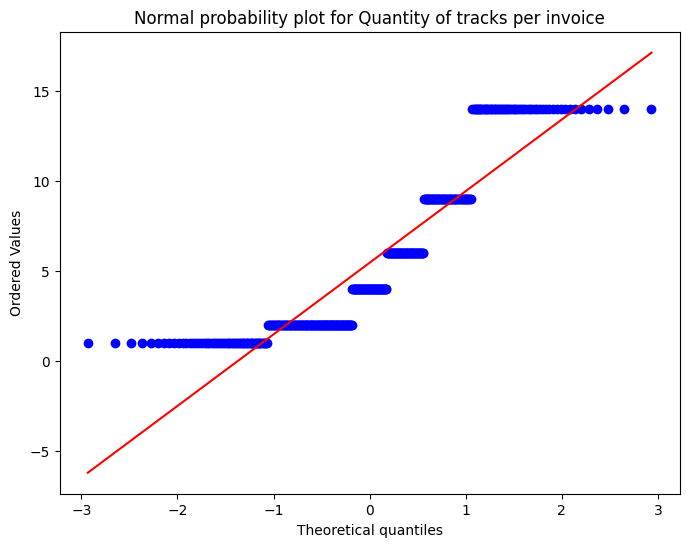

In [8]:
H0 ='Distribution of Quantity of tracks per invoice looks Gaussian'

track_count_per_invoice = df_invoiceline.groupby('InvoiceId')['Quantity'].count()

# Shapiro-Wilk test:

stat,p_value=shapiro(track_count_per_invoice)
print(f"Shapiro-Wilk test: p-value = {p_value} ,  stat={stat}")

alpha = 0.05
if p_value > alpha:
    print('Distribution of Quantity of tracks per invoice looks Gaussian (fail to reject H0)')
else:
    print('Distribution of Quantity of tracks per invoice does not look Gaussian (reject H0)')


# Kolmogorov-Smirnov test:
 
ks_result = kstest(track_count_per_invoice, 'norm')
print(f"Kolmogorov-Smirnov test: p-value = {ks_result.pvalue}")   

if ks_result.pvalue > alpha:
    print('Distribution of Quantity of tracks per invoice looks Gaussian (fail to reject H0)')
else:
    print('Distribution of Quantity of tracks per invoice does not look Gaussian (reject H0)') 

# Graphical assessment

plt.figure(figsize=(8, 6))
probplot(track_count_per_invoice, plot=plt)
plt.title('Normal probability plot for Quantity of tracks per invoice')
plt.gca().get_lines()[0].set_color('blue')   
plt.show()

According to all three normal probability test methods, the distribution of KP2 (tracks per invoice) is not a normal distribution.

Finding outliers using boxـplot:

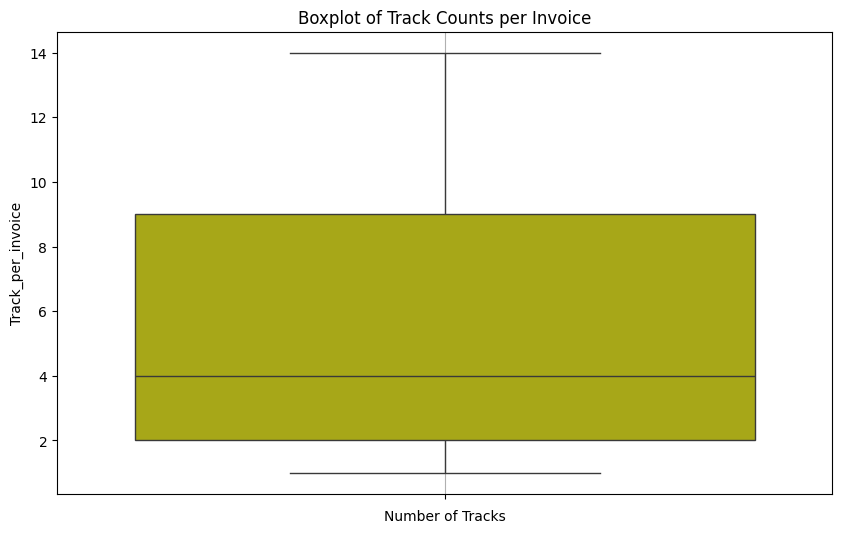

,InvoiceId,Track_per_invoice
0,1,2
1,2,4
2,3,6
3,4,9
4,5,14
...,...,...
407,408,4
408,409,6
409,410,9
410,411,14


In [40]:
# box_plot for Quantity of tracks per invoice:

track_count_per_invoice = df_invoiceline.groupby('InvoiceId')['Quantity'].count().reset_index()
track_count_per_invoice.columns = ['InvoiceId', 'Track_per_invoice']


plt.figure(figsize=(10, 6))
sns.boxplot(track_count_per_invoice['Track_per_invoice'] , color='y')
plt.title('Boxplot of Track Counts per Invoice')
plt.xlabel('Number of Tracks')
plt.grid(axis='x')
plt.show()
track_count_per_invoice

In [41]:
# finding outliers:
Q1 = track_count_per_invoice['Track_per_invoice'].quantile(0.25)
Q3 = track_count_per_invoice['Track_per_invoice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = track_count_per_invoice[(track_count_per_invoice['Track_per_invoice'] < lower_bound) | (track_count_per_invoice['Track_per_invoice'] > upper_bound)]
print(f'Outliers for quantity:{outliers}')
print(Q1,Q3, lower_bound,upper_bound)

Outliers for quantity:Empty DataFrame
Columns: [InvoiceId, Track_per_invoice]
Index: []
2.0 9.0 -8.5 19.5


There is no  for quantity distribution

In " Quantity of tracks per invoice" destribution , there is no outleir data.

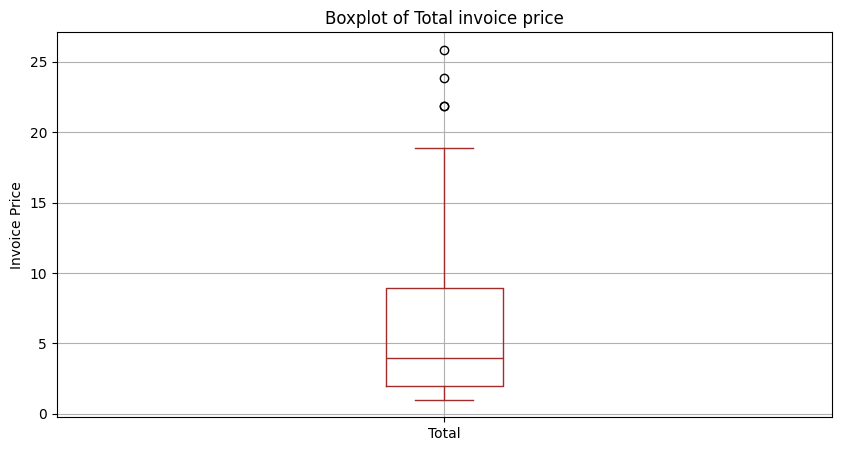

In [10]:
# box_plot for total revenue per invoice:

plt.figure(figsize=(10, 5))
df_invoice.boxplot(column=['Total'], color='brown')
plt.title('Boxplot of Total invoice price')
plt.ylabel('Invoice Price')
plt.show()


In [11]:
# finding outliers:
Q1 = df_invoice['Total'].quantile(0.25)
Q3 = df_invoice['Total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_invoice[(df_invoice['Total'] < lower_bound) | (df_invoice['Total'] > upper_bound)]
print(f'Outliers for Total:{outliers}')
print(Q1,Q3, lower_bound,upper_bound)

Outliers for Total:     InvoiceId  CustomerId InvoiceDate       BillingAddress BillingCity  \
95          96          45  2022-02-18    Erzsébet krt. 58.    Budapest   
193        194          46  2023-04-28     3 Chatham Street      Dublin   
298        299          26  2024-08-05  2211 W Berry Street  Fort Worth   
403        404           6  2025-11-13        Rilská 3174/6      Prague   

    BillingState  BillingCountry BillingPostalCode  Total  
95          None         Hungary            H-1073  21.86  
193       Dublin         Ireland              None  21.86  
298           TX             USA             76110  23.86  
403         None  Czech Republic             14300  25.86  
1.98 8.91 -8.415 19.305


Given that in the distribution "total revenue" there are only 4 Outliers data, maybe they can be ignored, but because the above data is related to the invoice amount and their deletion affects the final results, it is better not to delete them.

Finding 3 popular genres:

In [12]:
merged_df = df_invoiceline.merge(df_track, on='TrackId').merge(df_genre, on='GenreId')

genre_sales = merged_df.groupby('Name_y')['Quantity'].sum().sort_values(ascending=False)
mean_prices_genre = merged_df.groupby('Name_y')['UnitPrice_y'].mean()

top_genres = genre_sales.head(3)
print("Three Most Popular Genres:")
print(top_genres)
print("mean_price of Genre tracks:")
print(mean_prices_genre[['Rock','Latin','Metal']])


Three Most Popular Genres:
Name_y
Rock     835
Latin    386
Metal    264
Name: Quantity, dtype: int64
mean_price of Genre tracks:
Name_y
Rock     0.99
Latin    0.99
Metal    0.99
Name: UnitPrice_y, dtype: float64


The most popular genres in order: 1- Rock  2- Latin , 3- Metal 
there is no difrance between means of top Ganres prices

To check the independence between the length of the song (Milliseconds) and its price (UnitPrice) in the Track table,firt must be used the normality test for two parameters, then if both of them ore normal, Pearson's correlation test can be used. This test determines the degree of linear correlation between two variables.
If one of parameters or both are not normal, spearmanr's correlation test can be used

In [13]:
# correlation between track length and price :

# H0: There is no correlation between the length of the song and its price 

stat_length, p_value_length = shapiro(df_track['Milliseconds'])
print(f"Shapiro-Wilk Test for Track Length: Statistic={stat_length}, p-value={p_value_length}")

stat_price, p_value_price = shapiro(df_track['UnitPrice'])
print(f"Shapiro-Wilk Test for Price: Statistic={stat_price}, p-value={p_value_length}")

if p_value_length > 0.05 and p_value_length > 0.05:
    
    correlation, p_value = pearsonr(df_track['Milliseconds'], df_track['UnitPrice'])    # for normal destribution
    print(f"Pearson Correlation: {correlation}, p-value: {p_value}")
    
    
    if p_value < alpha:
        print("The null hypothesis is rejected,There is a correlation between the length of the song and its price.")
    else:
        print("The null hypothesis is confirmed,There is no correlation between the length of the song and its price")

else:
   
    correlation, p_value = spearmanr(df_track['Milliseconds'],df_track['UnitPrice'])       # for unormal destribution
    print(f"Spearman Correlation: {correlation}, p-value: {p_value}")

    if p_value < alpha:
        print("The null hypothesis is rejected,There is a correlation between the length of the song and its price.")
    else:
        print("The null hypothesis is confirmed,There is no correlation between the length of the song and its price")



Shapiro-Wilk Test for Track Length: Statistic=0.4069350980582944, p-value=2.7287436202313686e-75
Shapiro-Wilk Test for Price: Statistic=0.25366636273367993, p-value=2.7287436202313686e-75
Spearman Correlation: 0.4099206080846446, p-value: 4.576036687486155e-142
The null hypothesis is rejected,There is a correlation between the length of the song and its price.


 For investigating the independence of "Genre" and "MediaType" by using Chi-Squared. This test is suitable for checking the independence between two qualitative variables.

In [14]:
# correlation between 'MediaType' and 'Genre' by using "Chi-2":

merged_df = df_track.merge(df_mediatype, on='MediaTypeId').merge(df_genre, on='GenreId')


contingency_table = pd.crosstab(merged_df['Name_y'], merged_df['Name_x'])  # Name_y for genre name, and Name_x for media name

chi2, p_value, dof, expected = chi2_contingency(contingency_table)


print(f'Chi-Squared Statistic: {chi2}')
print(f'p-value: {p_value}')


alpha = 0.05
if p_value < alpha:
    print("There is a significant association between genre and media type.")
else:
    print("There is no significant association between genre and media type.")
    



Chi-Squared Statistic: 13519.037479520488
p-value: 0.0012092442869131447
There is a significant association between genre and media type.


Examining the independence between 'song size' and  'song price'

In [15]:
# corrilation between track size and price by using "pearson test"
# H0 = There is no correlation between track size and price

stat_length, p_value_length = shapiro(df_track['Bytes'])
print(f"Shapiro-Wilk Test for Track Size: Statistic={stat_length}, p-value={p_value_length}")

stat_price, p_value_price = shapiro(df_track['UnitPrice'])
print(f"Shapiro-Wilk Test for Price: Statistic={stat_price}, p-value={p_value_length}")

if p_value_length > 0.05 and p_value_length > 0.05:
    
    correlation, p_value = pearsonr(df_track['Bytes'], df_track['UnitPrice'])
    print(f"Pearson Correlation: {correlation}, p-value: {p_value}")
    
    
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant correlation between track size and price.")
    else:
         print("Fail to reject the null hypothesis: There is no significant correlation between track size and price.")

else:
   
    correlation, p_value = spearmanr(df_track['Bytes'],df_track['UnitPrice'])
    print(f"Spearman Correlation: {correlation}, p-value: {p_value}")

    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant correlation between track size and price.")
    else:
         print("Fail to reject the null hypothesis: There is no significant correlation between track size and price.")


Shapiro-Wilk Test for Track Size: Statistic=0.2756405817618164, p-value=1.7275565060666367e-79
Shapiro-Wilk Test for Price: Statistic=0.25366636273367993, p-value=1.7275565060666367e-79
Spearman Correlation: 0.41386143347943216, p-value: 4.831360302670962e-145
Reject the null hypothesis: There is a significant correlation between track size and price.


Checking the price range of tracks:

Total number of tracks:
3503
Number of Tracks for price categories:
UnitPrice
0.99    3290
1.99     213
Name: TrackId, dtype: int64


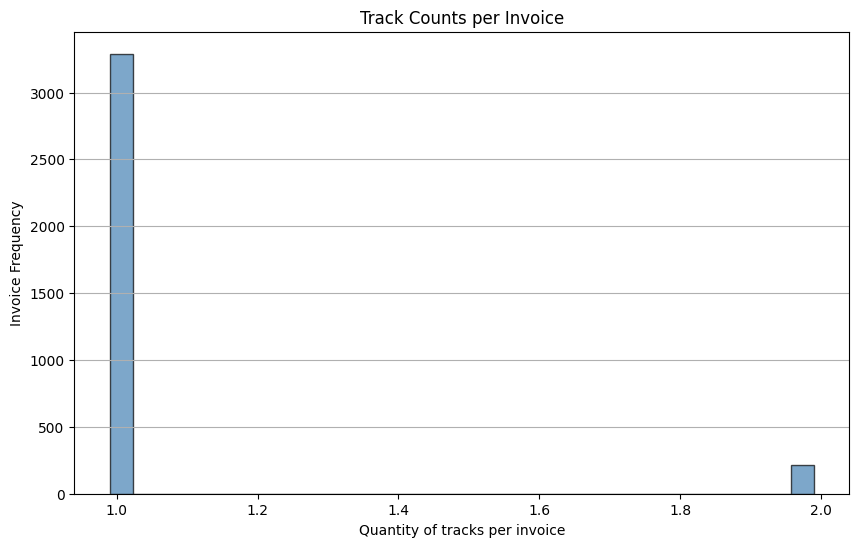

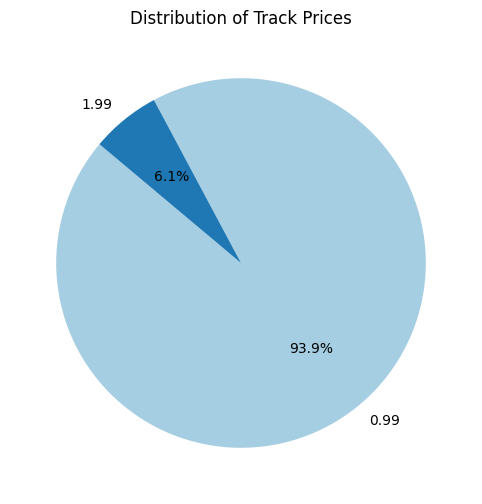

In [27]:
# calculation parameters
total_tracks=df_track['TrackId'].count()

print("Total number of tracks:")
print(total_tracks)

track_price=df_track.groupby('UnitPrice')['TrackId'].count()

print('Number of Tracks for price categories:')
print(track_price)

# histogram
plt.figure(figsize=(10, 6))
plt.hist(df_track['UnitPrice'], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Track Counts per Invoice')
plt.xlabel('Quantity of tracks per invoice')
plt.ylabel('Invoice Frequency')
plt.grid(axis='y')
plt.show()

# pie plot
price_counts = df_track['UnitPrice'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Track Prices')
plt.show()

Finding the Genres that contain the Most Expensive Tracks:

In [17]:

merged_df = df_track.merge(df_genre, on='GenreId')
max_price = merged_df['UnitPrice'].max()


expensive_genres = merged_df[merged_df['UnitPrice'] == max_price]['Name_y'].unique()


print("Genres with the Most Expensive Tracks:")
print(expensive_genres)

Genres with the Most Expensive Tracks:
['Science Fiction' 'TV Shows' 'Sci Fi & Fantasy' 'Drama' 'Comedy']


Calculation of the average length of songs in different genres : confidence interval = 95% 

First, for a better view, we calculate the mean for each genre and convert it to minutes:

                 Genre  MeanLength(ms)  MeanLength(minut)
0          Alternative    2.640585e+05           4.400975
1   Alternative & Punk    2.343538e+05           3.905897
2                Blues    2.703598e+05           4.505996
3           Bossa Nova    2.195900e+05           3.659833
4            Classical    2.938676e+05           4.897793
5               Comedy    1.585264e+06          26.421062
6                Drama    2.575284e+06          42.921396
7       Easy Listening    1.891642e+05           3.152737
8    Electronica/Dance    3.029858e+05           5.049763
9          Heavy Metal    2.974529e+05           4.957549
10         Hip Hop/Rap    1.781763e+05           2.969605
11                Jazz    2.917554e+05           4.862590
12               Latin    2.328593e+05           3.880988
13               Metal    3.097494e+05           5.162491
14               Opera    1.748130e+05           2.913550
15                 Pop    2.290341e+05           3.817235
16            

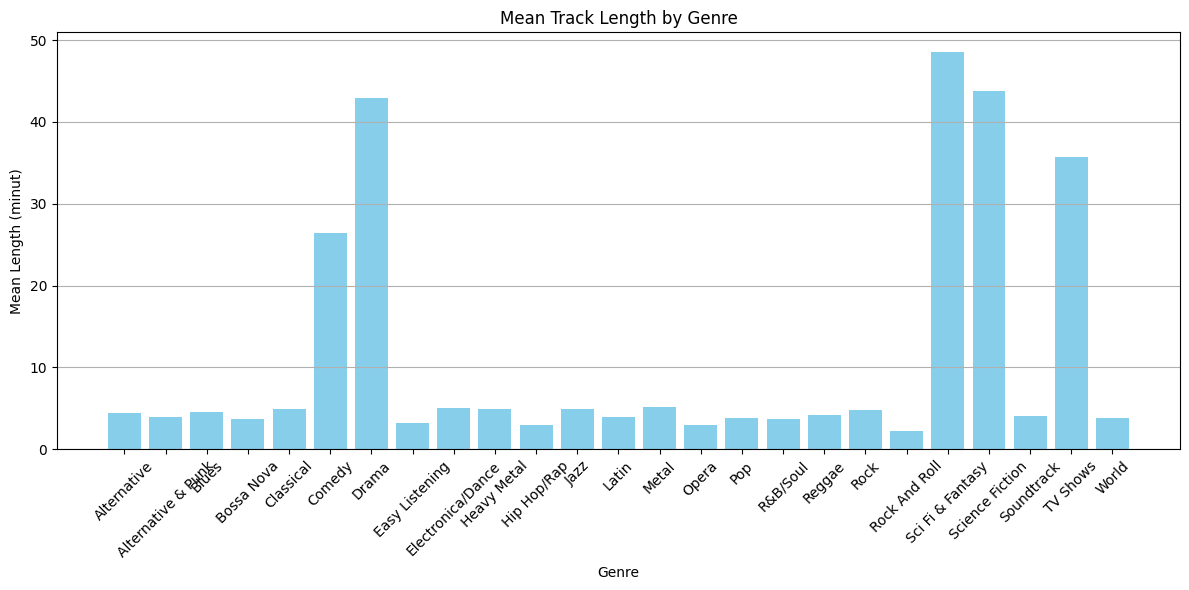

88.11588333333333
1071
2.2440583333333333
48.52971730769231


In [18]:

merged_df = df_track.merge(df_genre, on='GenreId')

def mean(data):
    mean = np.mean(data)
    return mean

genre_stats_mean = merged_df.groupby('Name_y')['Milliseconds'].apply(mean).reset_index()
genre_stats_mean.columns = ['Genre', 'MeanLength(ms)']
genre_stats_mean['MeanLength(minut)']=genre_stats_mean['MeanLength(ms)']/60000
print(genre_stats_mean)


plt.figure(figsize=(12, 6))
plt.bar(genre_stats_mean['Genre'], genre_stats_mean['MeanLength(minut)'], color='skyblue')
plt.title('Mean Track Length by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Length (minut)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print((merged_df['Milliseconds'].max())/60000)
print(merged_df['Milliseconds'].min())
print(genre_stats_mean["MeanLength(minut)"].min())
print(genre_stats_mean["MeanLength(minut)"].max())


As can be seen, the average duration of songs in different genres is not the same, and in some genres they differ greatly from others.

In the next step, we also calculate the confidence interval and draw the diagram based on the average and confidence interval:

                 Genre          Mean      CI_Lower      CI_Upper
0          Alternative  2.640585e+05  2.381919e+05  2.899251e+05
1   Alternative & Punk  2.343538e+05  2.258552e+05  2.428525e+05
2                Blues  2.703598e+05  2.489084e+05  2.918112e+05
3           Bossa Nova  2.195900e+05  1.757292e+05  2.634508e+05
4            Classical  2.938676e+05  2.625172e+05  3.252180e+05
5               Comedy  1.585264e+06  1.370615e+06  1.799912e+06
6                Drama  2.575284e+06  2.445991e+06  2.704577e+06
7       Easy Listening  1.891642e+05  1.710661e+05  2.072624e+05
8    Electronica/Dance  3.029858e+05  2.743313e+05  3.316403e+05
9          Heavy Metal  2.974529e+05  2.530755e+05  3.418304e+05
10         Hip Hop/Rap  1.781763e+05  1.515898e+05  2.047628e+05
11                Jazz  2.917554e+05  2.693487e+05  3.141620e+05
12               Latin  2.328593e+05  2.273711e+05  2.383474e+05
13               Metal  3.097494e+05  2.987796e+05  3.207193e+05
14               Opera  1

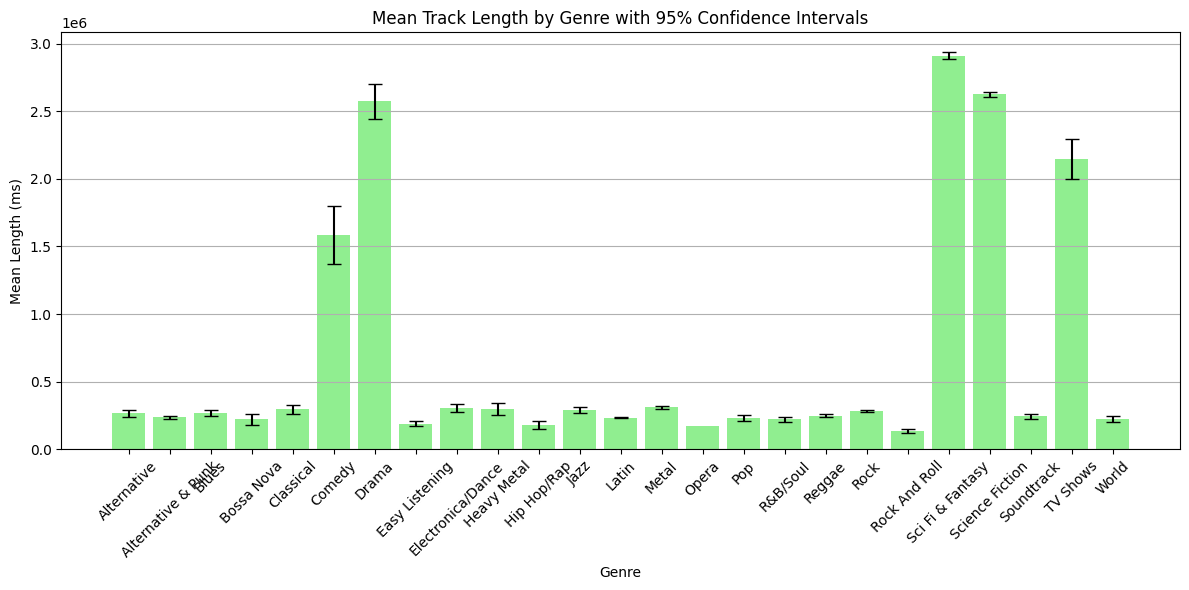

,Genre,Mean,CI_Lower,CI_Upper
0,Alternative,2.640585e+05,2.381919e+05,2.899251e+05
1,Alternative & Punk,2.343538e+05,2.258552e+05,2.428525e+05
2,Blues,2.703598e+05,2.489084e+05,2.918112e+05
3,Bossa Nova,2.195900e+05,1.757292e+05,2.634508e+05
4,Classical,2.938676e+05,2.625172e+05,3.252180e+05
5,Comedy,1.585264e+06,1.370615e+06,1.799912e+06
6,Drama,2.575284e+06,2.445991e+06,2.704577e+06
7,Easy Listening,1.891642e+05,1.710661e+05,2.072624e+05
8,Electronica/Dance,3.029858e+05,2.743313e+05,3.316403e+05
9,Heavy Metal,2.974529e+05,2.530755e+05,3.418304e+05


In [19]:


merged_df = df_track.merge(df_genre, on='GenreId')


def confidence_interval(data):
    mean = np.mean(data)
    sem = stats.sem(data)  
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
    return mean, ci[0], ci[1]

genre_stats_ci = merged_df.groupby('Name_y')['Milliseconds'].apply(confidence_interval).reset_index()
genre_stats_ci[['Mean','CI_Lower', 'CI_Upper']] = pd.DataFrame(genre_stats_ci['Milliseconds'].tolist(), index=genre_stats_ci.index)

genre_stats_ci = genre_stats_ci.drop('Milliseconds', axis=1)
genre_stats_ci = genre_stats_ci.rename(columns={'Name_y': 'Genre'})

print(genre_stats_ci)

plt.figure(figsize=(12, 6))
plt.bar(genre_stats_ci['Genre'], genre_stats_ci['Mean'], color='lightgreen',
        yerr=[genre_stats_ci['Mean'] - genre_stats_ci['CI_Lower'], genre_stats_ci['CI_Upper'] - genre_stats_ci['Mean']], capsize=5)
plt.title('Mean Track Length by Genre with 95% Confidence Intervals')
plt.xlabel('Genre')
plt.ylabel('Mean Length (ms)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
genre_stats_ci

Calculation of average sales in different countries : confidence interval  = 95 ٪

           Country  Mean_Sales  CI_Lower   CI_Upper
0        Argentina    5.374286  1.084404   9.664167
1        Australia    5.374286  1.084404   9.664167
2          Austria    6.088571  0.295920  11.881223
3          Belgium    5.374286  1.084404   9.664167
4           Brazil    5.431429  3.945992   6.916865
5           Canada    5.427857  4.268338   6.587377
6            Chile    6.660000  0.546630  12.773370
7   Czech Republic    6.445714  2.363986  10.527442
8          Denmark    5.374286  1.084404   9.664167
9          Finland    5.945714  1.616139  10.275289
10          France    5.574286  4.037098   7.111473
11         Germany    5.588571  3.770560   7.406583
12         Hungary    6.517143 -0.234038  13.268324
13           India    5.789231  3.150040   8.428421
14         Ireland    6.517143 -0.234038  13.268324
15           Italy    5.374286  1.084404   9.664167
16     Netherlands    5.802857  1.332210  10.273504
17          Norway    5.660000  0.788591  10.531409
18          

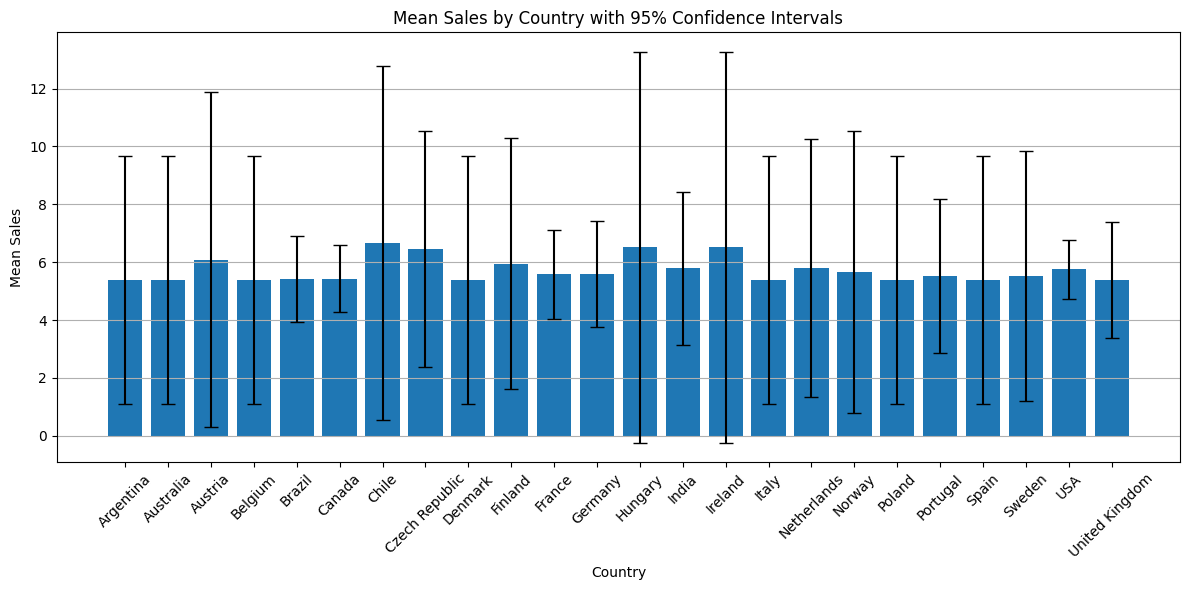

In [20]:

def confidence_interval(data):
    mean = np.mean(data)
    sem = stats.sem(data) 
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
    return mean,ci[0],ci[1]

country_stats = df_invoice.groupby('BillingCountry')['Total'].apply(confidence_interval).reset_index()
country_stats[['Mean_Sales','CI_Lower', 'CI_Upper']] = pd.DataFrame(country_stats['Total'].tolist(), index=country_stats.index)

country_stats = country_stats.drop('Total', axis=1)
country_stats = country_stats.rename(columns={'BillingCountry': 'Country'})

print(country_stats)


plt.figure(figsize=(12, 6))

plt.bar(country_stats['Country'], country_stats['Mean_Sales'], 
        yerr=[country_stats['Mean_Sales']-country_stats['CI_Lower'], country_stats['CI_Upper'] - country_stats['Mean_Sales']], capsize=5)

plt.title('Mean Sales by Country with 95% Confidence Intervals')
plt.xlabel('Country')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The average sales in different countries are not the same, and the confidence interval in some columns is very different from the average, which may be due to the small number of sales in those countries or the large difference between the orders of that country.

Calculation of the average number of songs purchased by each user : confidence interval  = 95 ٪

     InvoiceId  Quantity  CustomerId
0            1         2           2
1            2         4           4
2            3         6           8
3            4         9          14
4            5        14          23
..         ...       ...         ...
407        408         4          25
408        409         6          29
409        410         9          35
410        411        14          44
411        412         1          58

[412 rows x 3 columns]
    CustomerId                                           Quantity
0            1  (5.428571428571429, 1.09535760738863, 9.761785...
1            2  (5.428571428571429, 1.09535760738863, 9.761785...
2            3  (5.428571428571429, 1.09535760738863, 9.761785...
3            4  (5.428571428571429, 1.09535760738863, 9.761785...
4            5  (5.428571428571429, 1.09535760738863, 9.761785...
5            6  (5.428571428571429, 1.09535760738863, 9.761785...
6            7  (5.428571428571429, 1.09535760738863, 9.761785...
7   

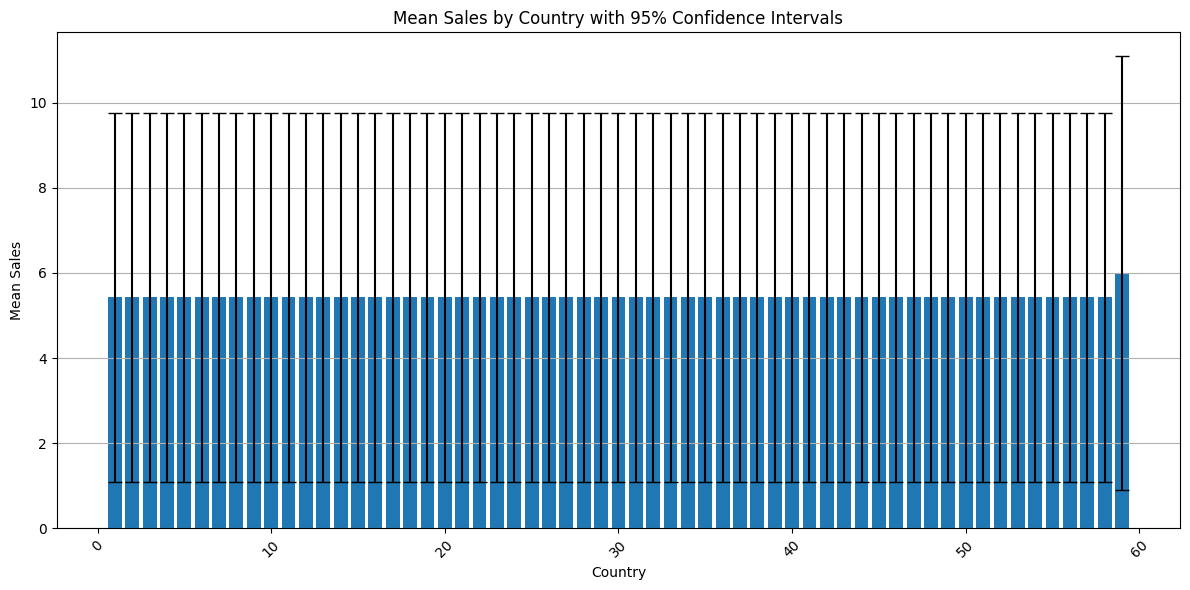

In [22]:
 
purchase_counts = df_invoiceline.groupby('InvoiceId')['Quantity'].sum().reset_index()
purchase_counts = purchase_counts.merge(df_invoice[['InvoiceId', 'CustomerId']], on='InvoiceId')

print(purchase_counts)


def confidence_interval(data):
    mean = np.mean(data)
    sem = stats.sem(data) 
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
    return mean,ci[0],ci[1]


mean_purchases = purchase_counts.groupby('CustomerId')['Quantity'].apply(confidence_interval).reset_index()
print(mean_purchases)
mean_purchases[['Mean_Q','CI_Lower','CI_Upper']] = pd.DataFrame(mean_purchases['Quantity'].tolist(), index=mean_purchases.index)

mean_purchases = mean_purchases.drop('Quantity', axis=1)


plt.figure(figsize=(12, 6))

plt.bar(mean_purchases['CustomerId'], mean_purchases['Mean_Q'], 
        yerr=[mean_purchases['Mean_Q']-mean_purchases['CI_Lower'], mean_purchases['CI_Upper'] - mean_purchases['Mean_Q']], capsize=5)

plt.title('Average number of songs purchased of each customer by 95% Confidence Intervals')
plt.xlabel('CustomerId')
plt.ylabel('average number of songs purchased')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
